# Study of the resulting distributions
In this notebook we want to compare the resulting distributions by applying various statistical methods to quantify differences and similarities.
## Frequencies of Linguistic Elements
To assess the similarity of the resulting distributions, we compute the [*Wasserstein-Metric*](https://en.wikipedia.org/wiki/Wasserstein_metric) of each pair of distributions.
The Wasserstein-Metric is a distance function for probability distributions. It satisfies the criteria of actual mathematical metrics and thus enables comparisons between probability distributions. Assuming one-dimensional distributions, the Wasserstein Distance of two empirical samples $P$ and $Q$ with respective random variables $X_1,...,X_n$ and $Y_1,...,Y_n$ is given by:
$$ W_{p}(P,Q)=\left({\frac {1}{n}}\sum _{i=1}^{n}\|X_{(i)}-Y_{(i)}\|^{p}\right)^{\frac {1}{p}}$$ 
Let's compute the Wasserstein-Metric for the frequencies of Characters, Words, Named Entities and Queries:


In [1]:
from thesis_schneg.vis_modules import _get_results_paths, load_results
from pyarrow import compute as pc
from scipy.stats import wasserstein_distance
import numpy as np

analyses = []
# set analysis that should be analyzed
# analyses.append('query-frequencies')
# analyses.append('extract-named-entities')
# analyses.append('extract-words')
analyses.append('extract-chars')

# test_data = True
test_data = False

cleaned_aql = True

col = ['count()']

Load Data:

In [2]:
from time import time
# load data
analysis_data = {}
for analysis in analyses:
    print(f"Start loading \"{analysis}\"")
    datasets = {}
    for dataset in ["aol","aql","ms-marco","orcas"]:
        start_time = time()
        paths = _get_results_paths(dataset, analysis, cleaned_aql)
        result_data = load_results(paths, test_data=test_data, cols=col)
        datasets.update({dataset: result_data})
        end_time = time()
        print(f"{dataset.upper()} loaded in {(end_time - start_time)/60} min")
    analysis_data.update({analysis: datasets})

Start loading "extract-chars"
AOL loaded in 0.13485427697499594 min
/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aql-extract-chars-special
AQL loaded in 1.032812809944153 min
MS-MARCO loaded in 1.0881295522054037 min
ORCAS loaded in 0.10830211242039998 min


Compute Wasserstein-Metric:

In [3]:
from thesis_schneg.vis_modules import get_max_x
from numpy import ndarray
from pandas import DataFrame
cnt=0
distances_data = {}
for analysis, datasets in analysis_data.items():
    print(analysis)
    x_max = get_max_x(datasets, "count()")
    # print(x_max)
    # distances = ndarray((len(datasets), len(datasets)))
    distances = DataFrame(np.zeros((len(datasets), len(datasets))), index=datasets.keys(), columns=datasets.keys())
    names = []
    j=0
    for dataset_name, data in datasets.items():
        data1 = {dataset_name: data.sort_values("count()", ascending=True)}
        names.append(dataset_name)
        x_vals = np.arange(1, x_max+1)
        y_vals = data1[dataset_name]['count()'][0:x_max].to_numpy()
        if len(y_vals) < x_max:
            y_vals = np.append(y_vals, np.zeros(x_max-len(y_vals)))
        i=0
        for dataset_name, data in datasets.items():
            if dataset_name in names:
                dist = 0
            else:
                data2 = data.sort_values("count()", ascending=True)
                x_vals2 = np.arange(1, x_max+1)
                y_vals2 = data2['count()'][0:x_max].to_numpy()
                if len(y_vals2) < x_max:
                    y_vals2 = np.append(y_vals2, np.zeros(x_max-len(y_vals2)))
                dist = wasserstein_distance(x_vals, x_vals2, u_weights=y_vals, v_weights=y_vals2)
            # distances[i][j] = dist
            distances.iloc[i, j] = dist
            i+=1
        j+=1
    distances = distances + distances.T
    distances_data.update({analysis: distances})
    cnt+=1
for key, value in distances_data.items():
    print(value)

## get avarage wasserstein distances per query log
avg_distances = {}
for analysis, distances in distances_data.items():
    avg_distances.update({analysis: distances.mean().mean()})
    
for key, value in avg_distances.items():
    print(key, value)

extract-chars
get x_max...
aol
aql
ms-marco
orcas


: 

### Measuring Distances by computing pairwise KS-Statistic
As a second approach, we take the pairwise ks-statistic as a measure of distance between the distributions. The ks-statistic is a measure of the maximum distance between two empirical cumulative distribution functions (CDFs). It is defined as the maximum absolute difference between the two CDFs. The ks-statistic is a non-parametric test that does not assume any specific distribution for the data. It is often used to compare two samples to determine if they come from the same distribution. In this case, however, we are only interested in differences and not in goodness-of-fit.

In [2]:
from thesis_schneg.vis_modules import _get_results_paths, load_results
from pyarrow import compute as pc
from scipy.stats import wasserstein_distance
import numpy as np

analyses = []
# set analysis that should be analyzed
# analyses.append('query-frequencies')
analyses.append('extract-named-entities')
analyses.append('extract-words')
analyses.append('extract-chars')

# test_data = True
test_data = False

cleaned_aql = True

col = ['count()']

Load Data:

In [3]:
from time import time
# load data
analysis_data = {}
for analysis in analyses:
    print(f"Start loading \"{analysis}\"")
    datasets = {}
    for dataset in ["aol","aql","ms-marco","orcas"]:
        start_time = time()
        paths = _get_results_paths(dataset, analysis, cleaned_aql)
        result_data = load_results(paths, test_data=test_data, cols=col)
        datasets.update({dataset: result_data})
        end_time = time()
        print(f"{dataset.upper()} loaded in {(end_time - start_time)/60} min")
    analysis_data.update({analysis: datasets})

Start loading "extract-named-entities"
AOL loaded in 5.334089982509613 min
aql-extract-named-entities-special
AQL loaded in 0.47218002478281657 min
MS-MARCO loaded in 5.6534987727801 min
ORCAS loaded in 4.696689983208974 min
Start loading "extract-words"
AOL loaded in 0.43039833307266234 min
aql-extract-words-special
AQL loaded in 2.036743207772573 min
MS-MARCO loaded in 0.3916335185368856 min
ORCAS loaded in 0.3837420344352722 min
Start loading "extract-chars"
AOL loaded in 0.15588429768880208 min
aql-extract-chars-special
AQL loaded in 2.2771036863327025 min
MS-MARCO loaded in 1.7032682458559671 min
ORCAS loaded in 0.13418150345484417 min


Compute pairwise KS-Statistic:

In [4]:
from pandas import DataFrame
import numpy as np

cnt=0
distances_data = {}
for analysis, datasets in analysis_data.items():
    print(analysis)

    # compute maximum length in the result data
    x_maxes = []
    for dataset_name, data in datasets.items():
        x_maxes.append(len(data['count()']))
    x_max = min(x_maxes)
    # print(x_max)



    distances = DataFrame(np.zeros((len(datasets), len(datasets))), index=datasets.keys(), columns=datasets.keys())
    names = []
    # compute ks stats
    j = 0     
    for dataset_name, data in datasets.items(): 
        # normalize data and trim to x_max
        data = data.iloc[0:x_max]
        data['count()'] = data['count()'] / data['count()'].sum()

        # print(dataset_name.upper())   
        names.append(dataset_name)
        y_vals = data.sort_values("count()", ascending=True)['count()'].cumsum().to_numpy()
        i=0
        for dataset_name, data in datasets.items():
            if dataset_name in names:
                dist = 0
            else:
                data = data.iloc[0:x_max]
                data['count()'] = data['count()'] / data['count()'].sum()
                # print(dataset_name)
                y_vals2 = data.sort_values("count()", ascending=True)['count()'].cumsum().to_numpy()
                dist = y_vals - y_vals2
                dist = np.max(np.abs(dist))
                # dist = np.max(np.abs(y_vals.cumsum() - y_vals2.cumsum()))
                index = np.argmax(np.abs(y_vals - y_vals2))
                # print("index", index)    
                # print(y_vals[index], y_vals2[index])
                # print(dist)
            distances.iloc[i, j] = dist
            i+=1
        j+=1
    distances = distances + distances.T
    distances_data.update({analysis: distances})
    cnt+=1

for key, value in distances_data.items():
    print(value)

## get avarage ks distances per query log
avg_distances = {}
for analysis, distances in distances_data.items():
    avg_distances.update({analysis: np.sum(distances/3)})
    
for key, value in avg_distances.items():
    print(key, value)

extract-named-entities


/tmp/ipykernel_196566/4049788104.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['count()'] = data['count()'] / data['count()'].sum()
/tmp/ipykernel_196566/4049788104.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['count()'] = data['count()'] / data['count()'].sum()


extract-words


/tmp/ipykernel_196566/4049788104.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['count()'] = data['count()'] / data['count()'].sum()
/tmp/ipykernel_196566/4049788104.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['count()'] = data['count()'] / data['count()'].sum()


extract-chars
               aol       aql  ms-marco     orcas
aol       0.000000  0.180867  0.250349  0.068425
aql       0.180867  0.000000  0.392196  0.197854
ms-marco  0.250349  0.392196  0.000000  0.197030
orcas     0.068425  0.197854  0.197030  0.000000
               aol       aql  ms-marco     orcas
aol       0.000000  0.642143  0.197392  0.256225
aql       0.642143  0.000000  0.456224  0.419735
ms-marco  0.197392  0.456224  0.000000  0.156228
orcas     0.256225  0.419735  0.156228  0.000000
               aol       aql  ms-marco     orcas
aol       0.000000  0.519565  0.791380  0.114768
aql       0.519565  0.000000  0.343905  0.492349
ms-marco  0.791380  0.343905  0.000000  0.744701
orcas     0.114768  0.492349  0.744701  0.000000
extract-named-entities aol         0.166547
aql         0.256972
ms-marco    0.279858
orcas       0.154436
dtype: float64
extract-words aol         0.365253
aql         0.506034
ms-marco    0.269948
orcas       0.277396
dtype: float64
extract-chars ao

/tmp/ipykernel_196566/4049788104.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['count()'] = data['count()'] / data['count()'].sum()
/tmp/ipykernel_196566/4049788104.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['count()'] = data['count()'] / data['count()'].sum()
/home/benjamin/studium/masterarbeit/thesis-schneg/src/venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will r

Visualize the Distance Configuration by applying Multidimensional Scaling:

extract-named-entities
extract-words
extract-chars


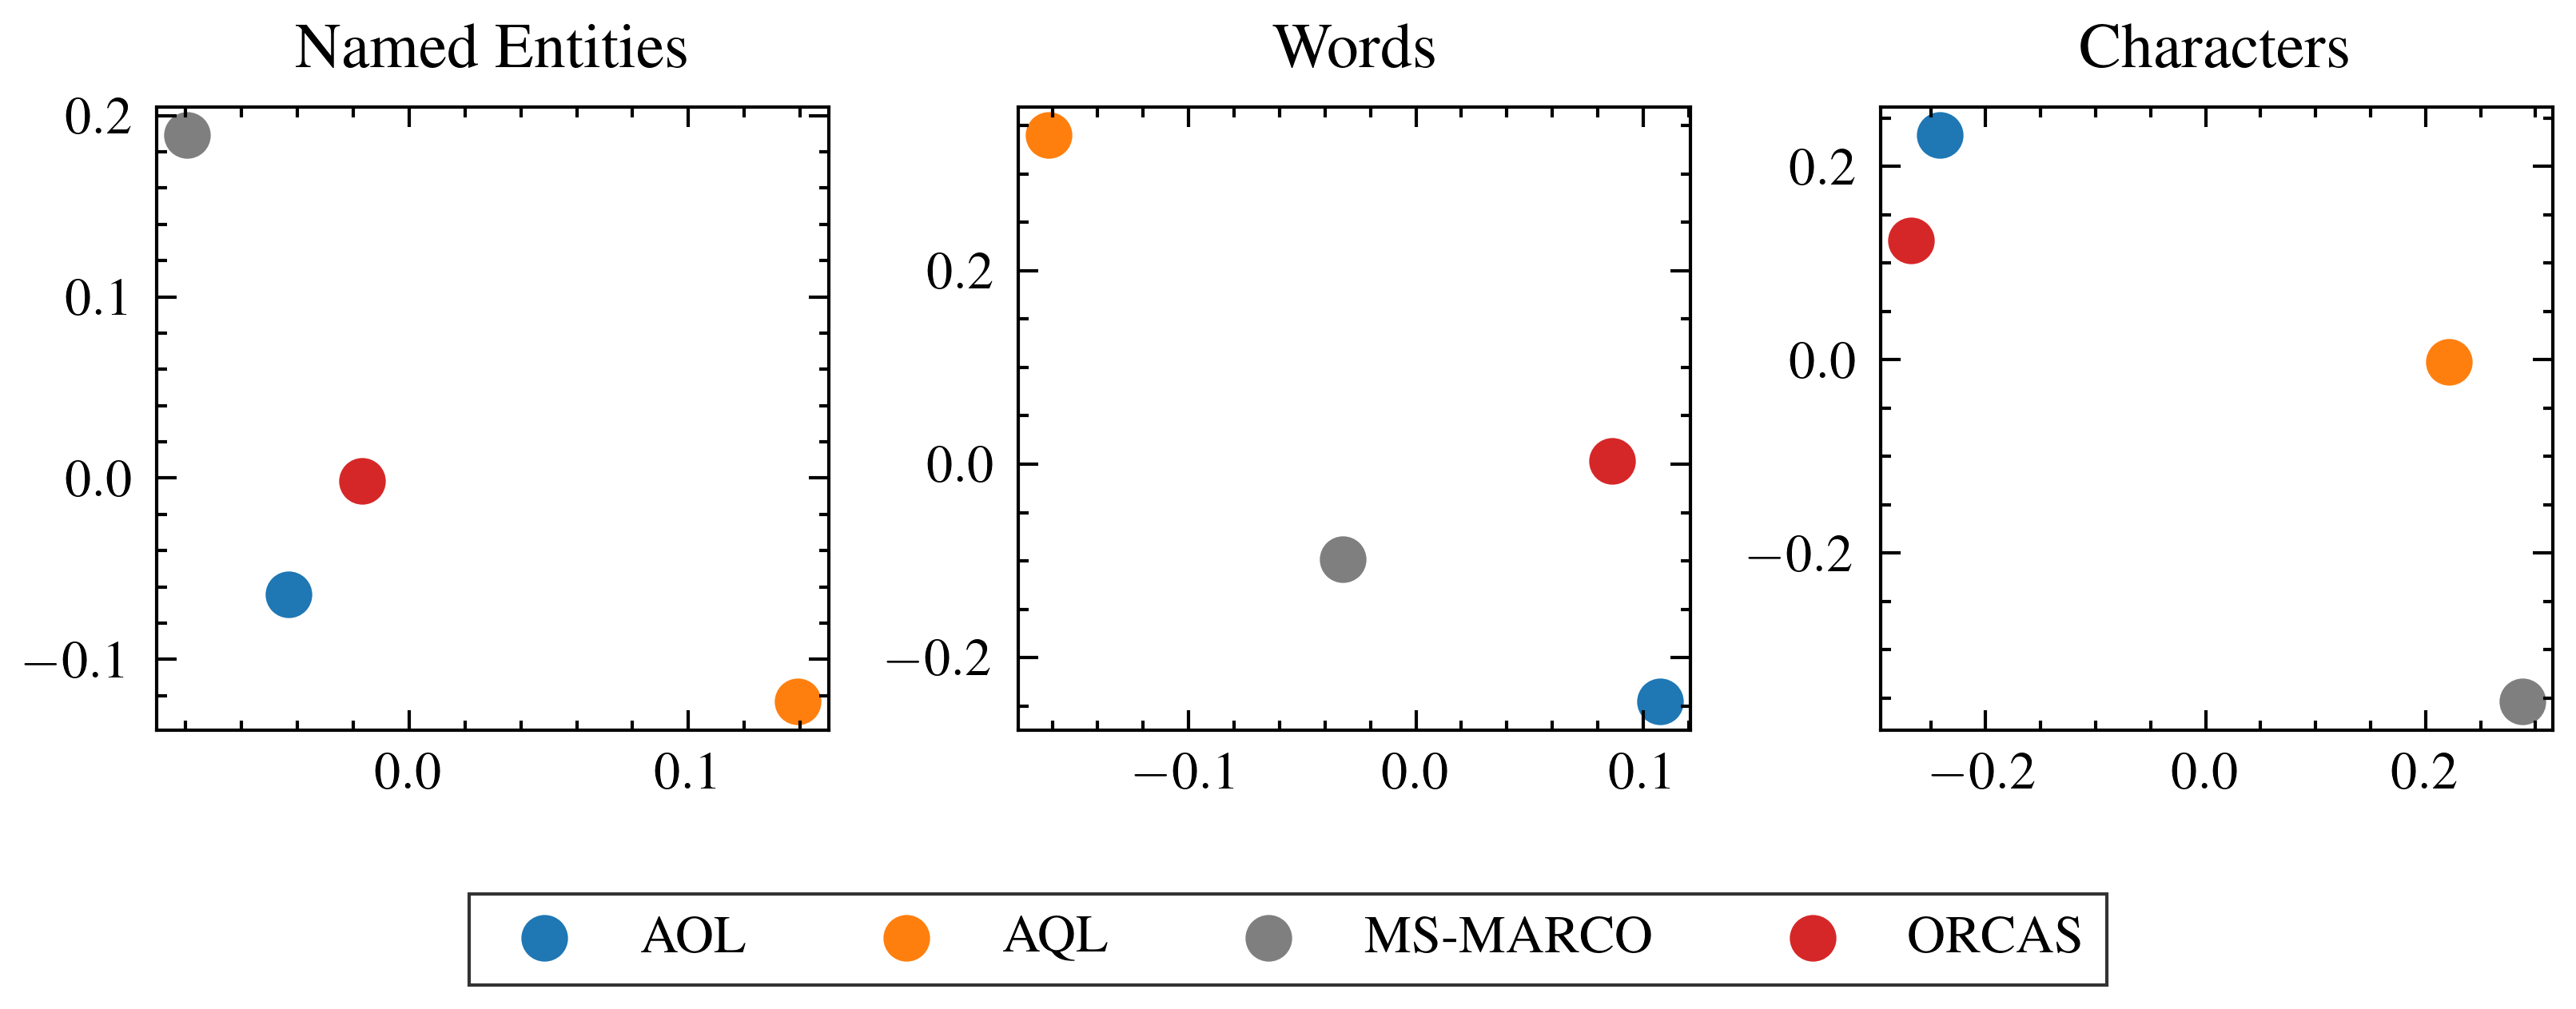

In [5]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
from pathlib import Path    
import scienceplots

# save visualization or not
save_vis: bool = False
# save_vis: bool = True

# use science style for plots from scienceplots library
plt.style.use(["science", "ieee"])

save_vis = True
# save_vis = False

mds = MDS(n_components=2, dissimilarity='precomputed')
trans_dists = {}
color =  ['tab:blue', 'tab:orange', 'tab:gray', 'tab:red']
for key, value in distances_data.items():
    print(key)
    trans_dists.update({key: mds.fit_transform(value)})

num_plots = len(trans_dists)
cols = 3
rows = num_plots//cols
if num_plots % cols != 0:
    rows+=1

textwidth = 5.5129
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio * 0.45

# fig,ax = plt.subplots(rows,cols, figsize=(4*cols,4*rows))
fig,ax = plt.subplots(rows,cols, figsize=(width,height))

# for key, value in trans_dists.items() and ax in ax.flatten():
key = [key for key in trans_dists.keys()]

datasets = ["aol","aql","ms-marco","orcas"]

axes = ax.flatten()
titles = ['Named Entities', 'Words', 'Characters']
for i in range(len(trans_dists)):
    ax = axes[i]
    value = trans_dists[key[i]]
    # plt.figure()
    for j in range(len(value)):
        ax.scatter(value[j][0], value[j][1], c=color[j], label=names[j].upper())
    # plt.scatter(trans_dists[key][:,0],trans_dists[key][:,1], c=color, label=names)
    # ax.title("MDS Plot of Wasserstein Distances")
    # plt.legend()
    # ax.set_xticks([])
    # ax.set_yticks([])
    ax.set_title(f"{titles[i].title()}")
    # ax.yticks([])
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels,fancybox=True,framealpha=0.5).get_frame().set_linewidth(0.5)
legend = fig.legend([name.upper() for name in datasets],loc='upper center', bbox_to_anchor=(0.5, -0.01), fancybox=False, ncol=len(names),edgecolor="black", frameon=True)
legend.get_frame().set_linewidth(0.5)
# fig.suptitle("MDS Plot of Wasserstein Distances")
plt.tight_layout()
plt.show()

base_path = "/home/benjamin/studium/masterarbeit/thesis-schneg/plots/"

vis_dir = Path(f"{base_path}KS-Distances-Linguistic-Elements")
if not vis_dir.exists() and save_vis:
        vis_dir.mkdir(parents=True)

if save_vis:
    fig.savefig(vis_dir.joinpath("all.pdf"), format='pdf')

## Length-related Frequencies
### 1. Kolmogerov-Smirnov-Test
First of all, we carry out a statistical test to check if the different distributions result from a common underlying distribution. We select the [*Kolmogerov-Smirnov-Test*](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test#Two-sample_Kolmogorov.E2.80.93Smirnov_test) to verify this hypothesis.  

The test computes a test statistic $D$ that is compared to a threshold $D_{\alpha}$ with a significance level $\alpha$. If
$$D < D_{\alpha}$$ 
then the two distributions are likely to be similar. If, in contrast, 
$$D \ge D_{\alpha}$$ 
then we can conclude the samples are not from a common distribution with a significance of $1-\alpha$. The test measures the maximum distance of the cumulative distribution functions $F$ of the involved distributions. Accordingly, $D$ is computed by
$$D = \mathrm{max} |( F_{1} - F_{2} )| $$
The threshold can be determined by 
$$D_{\alpha} = K_{\alpha}\sqrt{(n_1+n_2)/(n_1 \cdot n_2)} $$
$K_{\alpha}$ is a constant that is dependent on the significance level $\alpha$ and can be obtained by this table:


![image.png](attachment:image.png)

In [1]:
from thesis_schneg.model import DatasetName

##### set visualization configuration #####



# select dataset (if none is selected all datasets are visualized in a joint plot) 
dataset: DatasetName = None 
# dataset: DatasetName = 'aol'
# dataset: DatasetName = 'aql'
# dataset: DatasetName = 'ms-marco'
# dataset: DatasetName = 'orcas'

# plot cleaned aol data or not
cleaned_aol = False
# cleaned_aol = True

struc_level = []
struc_level.append('queries')
struc_level.append('named-entities')
struc_level.append('words')

base_analyses = []
base_analyses.append('character-count-frequencies') #-{struc}
base_analyses.append('word-count-frequencies')
base_analyses.append('entity-count-frequencies')

analyses = []
for item in base_analyses:
    for struc in struc_level:
        if item == 'word-count-frequencies' and struc != 'words':
            analyses.append(f'{item}-{struc}')
        elif item == 'entity-count-frequencies' and struc != 'named-entities' and struc != 'words':
            analyses.append(f'{item}-{struc}')
        elif item == 'character-count-frequencies':
            analyses.append(f'{item}-{struc}')

# test_data = True
test_data = False

normalize_data = True
# normalize_data = False


In [2]:
from thesis_schneg.vis_modules import _get_results_paths, load_results
from pathlib import Path
import time
color = None
label = None
# load data
analysis_data = []
for analysis_name in analyses:
    if dataset is None:
        result_data = {}
        # crawl files from all datasets and load into dictionary
        paths = {f"{name}": _get_results_paths(name, analysis_name, cleaned_aql=True) for name in [
            "aol", "aql", "ms-marco", "orcas"]}
        if analysis_name == 'character-count-frequencies-words' and cleaned_aol:
            base_path = Path("/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aol-words-character-count-frequencies-special")
            paths["aol"] = [path for path in base_path.iterdir(
        )]
        if analysis_name == 'character-count-frequencies-queries':
            base_path = Path("/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aql-get-char-count-special")
            paths["aql"] = [path for path in base_path.iterdir(
        )]
            
        for name, result_paths in paths.items():
            start_time = time.time()
            print(f"Loading data from {name} dataset")
            vis_data = load_results(result_paths, test_data=test_data)
            result_data.update({name: vis_data})
            end_time = time.time()  
            print(f"{name} loaded in {(end_time - start_time)/60} min")

        analysis_data.append(result_data)
    else:
        # load data from single dataset
        result_paths = _get_results_paths(dataset, analysis_name, cleaned_aql=True)
        if analysis_name == 'character-count-frequencies-words' and cleaned_aol:
            base_path = Path("/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aol-words-character-count-frequencies-special")
            result_paths = [path for path in base_path.iterdir(
        )]
        start_time = time.time()
        print(f"Loading data from {dataset} dataset")
        result_data = {dataset: load_results(result_paths)}
        end_time = time.time()  
        print(f"{dataset} loaded in {(end_time - start_time)/60} min")
        analysis_data.append(result_data)   

/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aql-character-count-frequencies-queries-special
Loading data from aol dataset
aol loaded in 0.23538933595021566 min
Loading data from aql dataset
aql loaded in 0.37209360202153524 min
Loading data from ms-marco dataset
ms-marco loaded in 0.17004571755727133 min
Loading data from orcas dataset
orcas loaded in 0.17229437430699665 min
/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aql-character-count-frequencies-named-entities-special
Loading data from aol dataset
aol loaded in 0.10616446733474731 min
Loading data from aql dataset
aql loaded in 0.2245997707049052 min
Loading data from ms-marco dataset
ms-marco loaded in 0.11634835799535116 min
Loading data from orcas dataset
orcas loaded in 0.09977917273839315 min
/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aql-character-count-frequencies-words-special
L

In [6]:
from thesis_schneg.vis_modules import ks_test, chi2_fit

cnt = 0
for analysis in analysis_data:
    print(analyses[cnt])
    test_data = analysis['aql']
    test_counts = []
    if 'character-count' in test_data.columns:
        # print("character-count")
        test_data = test_data.query('`character-count` > 0')
        test_data = test_data.query('`character-count` < 50').sort_values('character-count', ascending=True)
        test_data = test_data['count()'].to_numpy()
        col = 'character-count'
        max = 50
    elif 'entity-count' in test_data.columns:
        # print("entity-count")
        test_data = test_data.query('`entity-count` >= 0')
        test_data = test_data.query('`entity-count` < 3').sort_values('entity-count', ascending=True)
        test_data = test_data['count()'].to_numpy()
        col = 'entity-count'
        max = 3
    elif 'word-count' in test_data.columns:
        # print("word-count")
        test_data = test_data.query('`word-count` > 0')
        test_data = test_data.query('`word-count` < 8').sort_values('word-count', ascending=True)
        test_data = test_data['count()'].to_numpy()  
        col = 'word-count'
        max = 8
    # print(f"max: {max}")
    for dataset, data in analysis.items():
        if dataset != 'aql':
            exp_counts = []
            if col == 'entity-count':
                exp_data = data.query(f"`{col}` >= 0")
            else:
                exp_data = data.query(f"`{col}` > 0")
            exp_data = exp_data.query(f'`{col}` < {max}').sort_values(col, ascending=True)
            exp_data = exp_data['count()'].to_numpy()
            
            test_statistic, threshold, test_res = ks_test(test_data, exp_data, significance_lvl=0.05)
            print(f"Test AQL vs {dataset.upper()}: ks-test-statistic: {test_statistic} threshold: {threshold} common distribution: {test_res}")
            test_statistic, threshold, test_res = chi2_fit(test_data, exp_data, significance_lvl=0.05)
            print(f"Test AQL vs {dataset.upper()}: chi2-test-statistic: {test_statistic} threshold: {threshold} common distribution: {test_res}")

    

    cnt+=1

character-count-frequencies-queries
Test AQL vs AOL: ks-test-statistic: 0.11173531961695468 threshold: 0.00024166922498427152 common distribution: False
Test AQL vs AOL: chi2-test-statistic: 65750470.63159055 threshold: 65.17076890356984 common distribution: False
Test AQL vs MS-MARCO: ks-test-statistic: 0.12681904097342817 threshold: 0.0004602167429355898 common distribution: False
Test AQL vs MS-MARCO: chi2-test-statistic: 308275880.3753942 threshold: 65.17076890356984 common distribution: False
Test AQL vs ORCAS: ks-test-statistic: 0.2631041848885969 threshold: 0.000430322838737808 common distribution: False
Test AQL vs ORCAS: chi2-test-statistic: 4828928069.247391 threshold: 65.17076890356984 common distribution: False
character-count-frequencies-named-entities
Test AQL vs AOL: ks-test-statistic: 0.08229342045206064 threshold: 0.0012005150337576981 common distribution: False
Test AQL vs AOL: chi2-test-statistic: 2019180.2128319456 threshold: 65.17076890356984 common distribution: F

### 2. Wasserstein Metric
As we can see, the test clearly rejects the distributions being from the same underlying distribution. However, visualizations of the distributions showed that there are similarities. To assess, if the AQL's queries suit to the other realistic query logs, we measure distances between the distributions by computing the Wasserstein Metric.

In [6]:
from thesis_schneg.model import DatasetName
from thesis_schneg.vis_modules import _get_results_paths, load_results
from pyarrow import compute as pc
from scipy.stats import wasserstein_distance
import numpy as np

struc_level = []
struc_level.append('queries')
struc_level.append('named-Entities')
struc_level.append('words')

base_analyses = []
base_analyses.append('character-count') #-{struc}
base_analyses.append('word-count')
base_analyses.append('entity-count')

analyses = []
for item in base_analyses:
    for struc in struc_level:
        analyses.append(f'{item.lower()}-frequencies-{struc.lower()}')
    del struc_level[-1]

cleaned_aql = True

Load data:

In [7]:
from time import time
# load data
analysis_data = {}
for analysis in analyses:
    print(f"Start loading \"{analysis}\"")
    datasets = {}
    for dataset in ["aol","aql","ms-marco","orcas"]:
        start_time = time()
        paths = _get_results_paths(dataset, analysis, cleaned_aql)
        result_data = load_results(paths)
        datasets.update({dataset: result_data})
        end_time = time()
        print(f"{dataset.upper()} loaded in {(end_time - start_time)/60} min")
    analysis_data.update({analysis: datasets})

Start loading "character-count-frequencies-queries"
AOL loaded in 0.28865458567937213 min
aql-character-count-frequencies-queries-special
AQL loaded in 0.4506482561429342 min
MS-MARCO loaded in 0.214581831296285 min
ORCAS loaded in 0.173207155863444 min
Start loading "character-count-frequencies-named-entities"
AOL loaded in 0.13020538489023845 min
aql-character-count-frequencies-named-entities-special
AQL loaded in 0.2476572314898173 min
MS-MARCO loaded in 0.11214290857315064 min
ORCAS loaded in 0.1360381881395976 min
Start loading "character-count-frequencies-words"
AOL loaded in 0.09532318512598674 min
aql-character-count-frequencies-words-special
AQL loaded in 0.1625413179397583 min
MS-MARCO loaded in 0.06070883274078369 min
ORCAS loaded in 0.060262084007263184 min
Start loading "word-count-frequencies-queries"
AOL loaded in 0.03841067949930827 min
aql-word-count-frequencies-queries-special
AQL loaded in 0.13886986970901488 min
MS-MARCO loaded in 0.0500419020652771 min
ORCAS loaded

Compute Wasserstein Distances:

In [8]:
from thesis_schneg.vis_modules import get_max_x
from numpy import ndarray
from pandas import DataFrame
cnt=0
distances_data = {}
for analysis, datasets in analysis_data.items():
    x_max = get_max_x(datasets, f"{analysis.split('-')[0]}-count")
    distances = DataFrame(np.zeros((len(datasets), len(datasets))), index=datasets.keys(), columns=datasets.keys())
    names = []
    j=0
    for dataset_name, data in datasets.items():
        data1 = {dataset_name: data.sort_values(f"{analysis.split('-')[0]}-count", ascending=True)}
        names.append(dataset_name)
        x_vals = data1[dataset_name][f"{analysis.split('-')[0]}-count"][0:x_max]
        y_vals = data1[dataset_name]['count()'][0:x_max]
        i=0
        for dataset_name, data in datasets.items():
            if dataset_name in names:
                dist = 0
            else:
                data2 = data.sort_values(f"{analysis.split('-')[0]}-count", ascending=True)
                x_vals2 = data2[f"{analysis.split('-')[0]}-count"][0:x_max]
                y_vals2 = data2['count()'][0:x_max]
                dist = wasserstein_distance(x_vals, x_vals2, u_weights=y_vals, v_weights=y_vals2)
            distances.iloc[i, j] = round(dist,2)
            i+=1
        j+=1
    distances = distances + distances.T
    distances_data.update({analysis: distances})
    cnt+=1
for key, value in distances_data.items():
    print(key)
    print(value)

## get avarage wasserstein distances per query log
# avg_distances = {}
# for analysis, distances in distances_data.items():
#     avg_distances.update({analysis: distances.mean()})
    
# for key, value in avg_distances.items():
#     print(key, value)

character-count-frequencies-queries
           aol   aql  ms-marco  orcas
aol       0.00  5.54      2.56   3.72
aql       5.54  0.00      4.75   7.75
ms-marco  2.56  4.75      0.00   3.00
orcas     3.72  7.75      3.00   0.00
character-count-frequencies-named-entities
           aol   aql  ms-marco  orcas
aol       0.00  2.12      1.79   0.80
aql       2.12  0.00      2.86   1.98
ms-marco  1.79  2.86      0.00   1.03
orcas     0.80  1.98      1.03   0.00
character-count-frequencies-words
           aol   aql  ms-marco  orcas
aol       0.00  3.69      6.31   4.20
aql       3.69  0.00      6.29   4.17
ms-marco  6.31  6.29      0.00   2.20
orcas     4.20  4.17      2.20   0.00
word-count-frequencies-queries
           aol   aql  ms-marco  orcas
aol       0.00  0.58      0.69   0.89
aql       0.58  0.00      0.81   1.25
ms-marco  0.69  0.81      0.00   0.44
orcas     0.89  1.25      0.44   0.00
word-count-frequencies-named-entities
           aol   aql  ms-marco  orcas
aol       0.00  0.19

Visualize Distances by applying [MDS-transformation](https://en.wikipedia.org/wiki/Multidimensional_scaling):

character-count-frequencies-queries
character-count-frequencies-named-entities
character-count-frequencies-words
word-count-frequencies-queries
word-count-frequencies-named-entities
entity-count-frequencies-queries


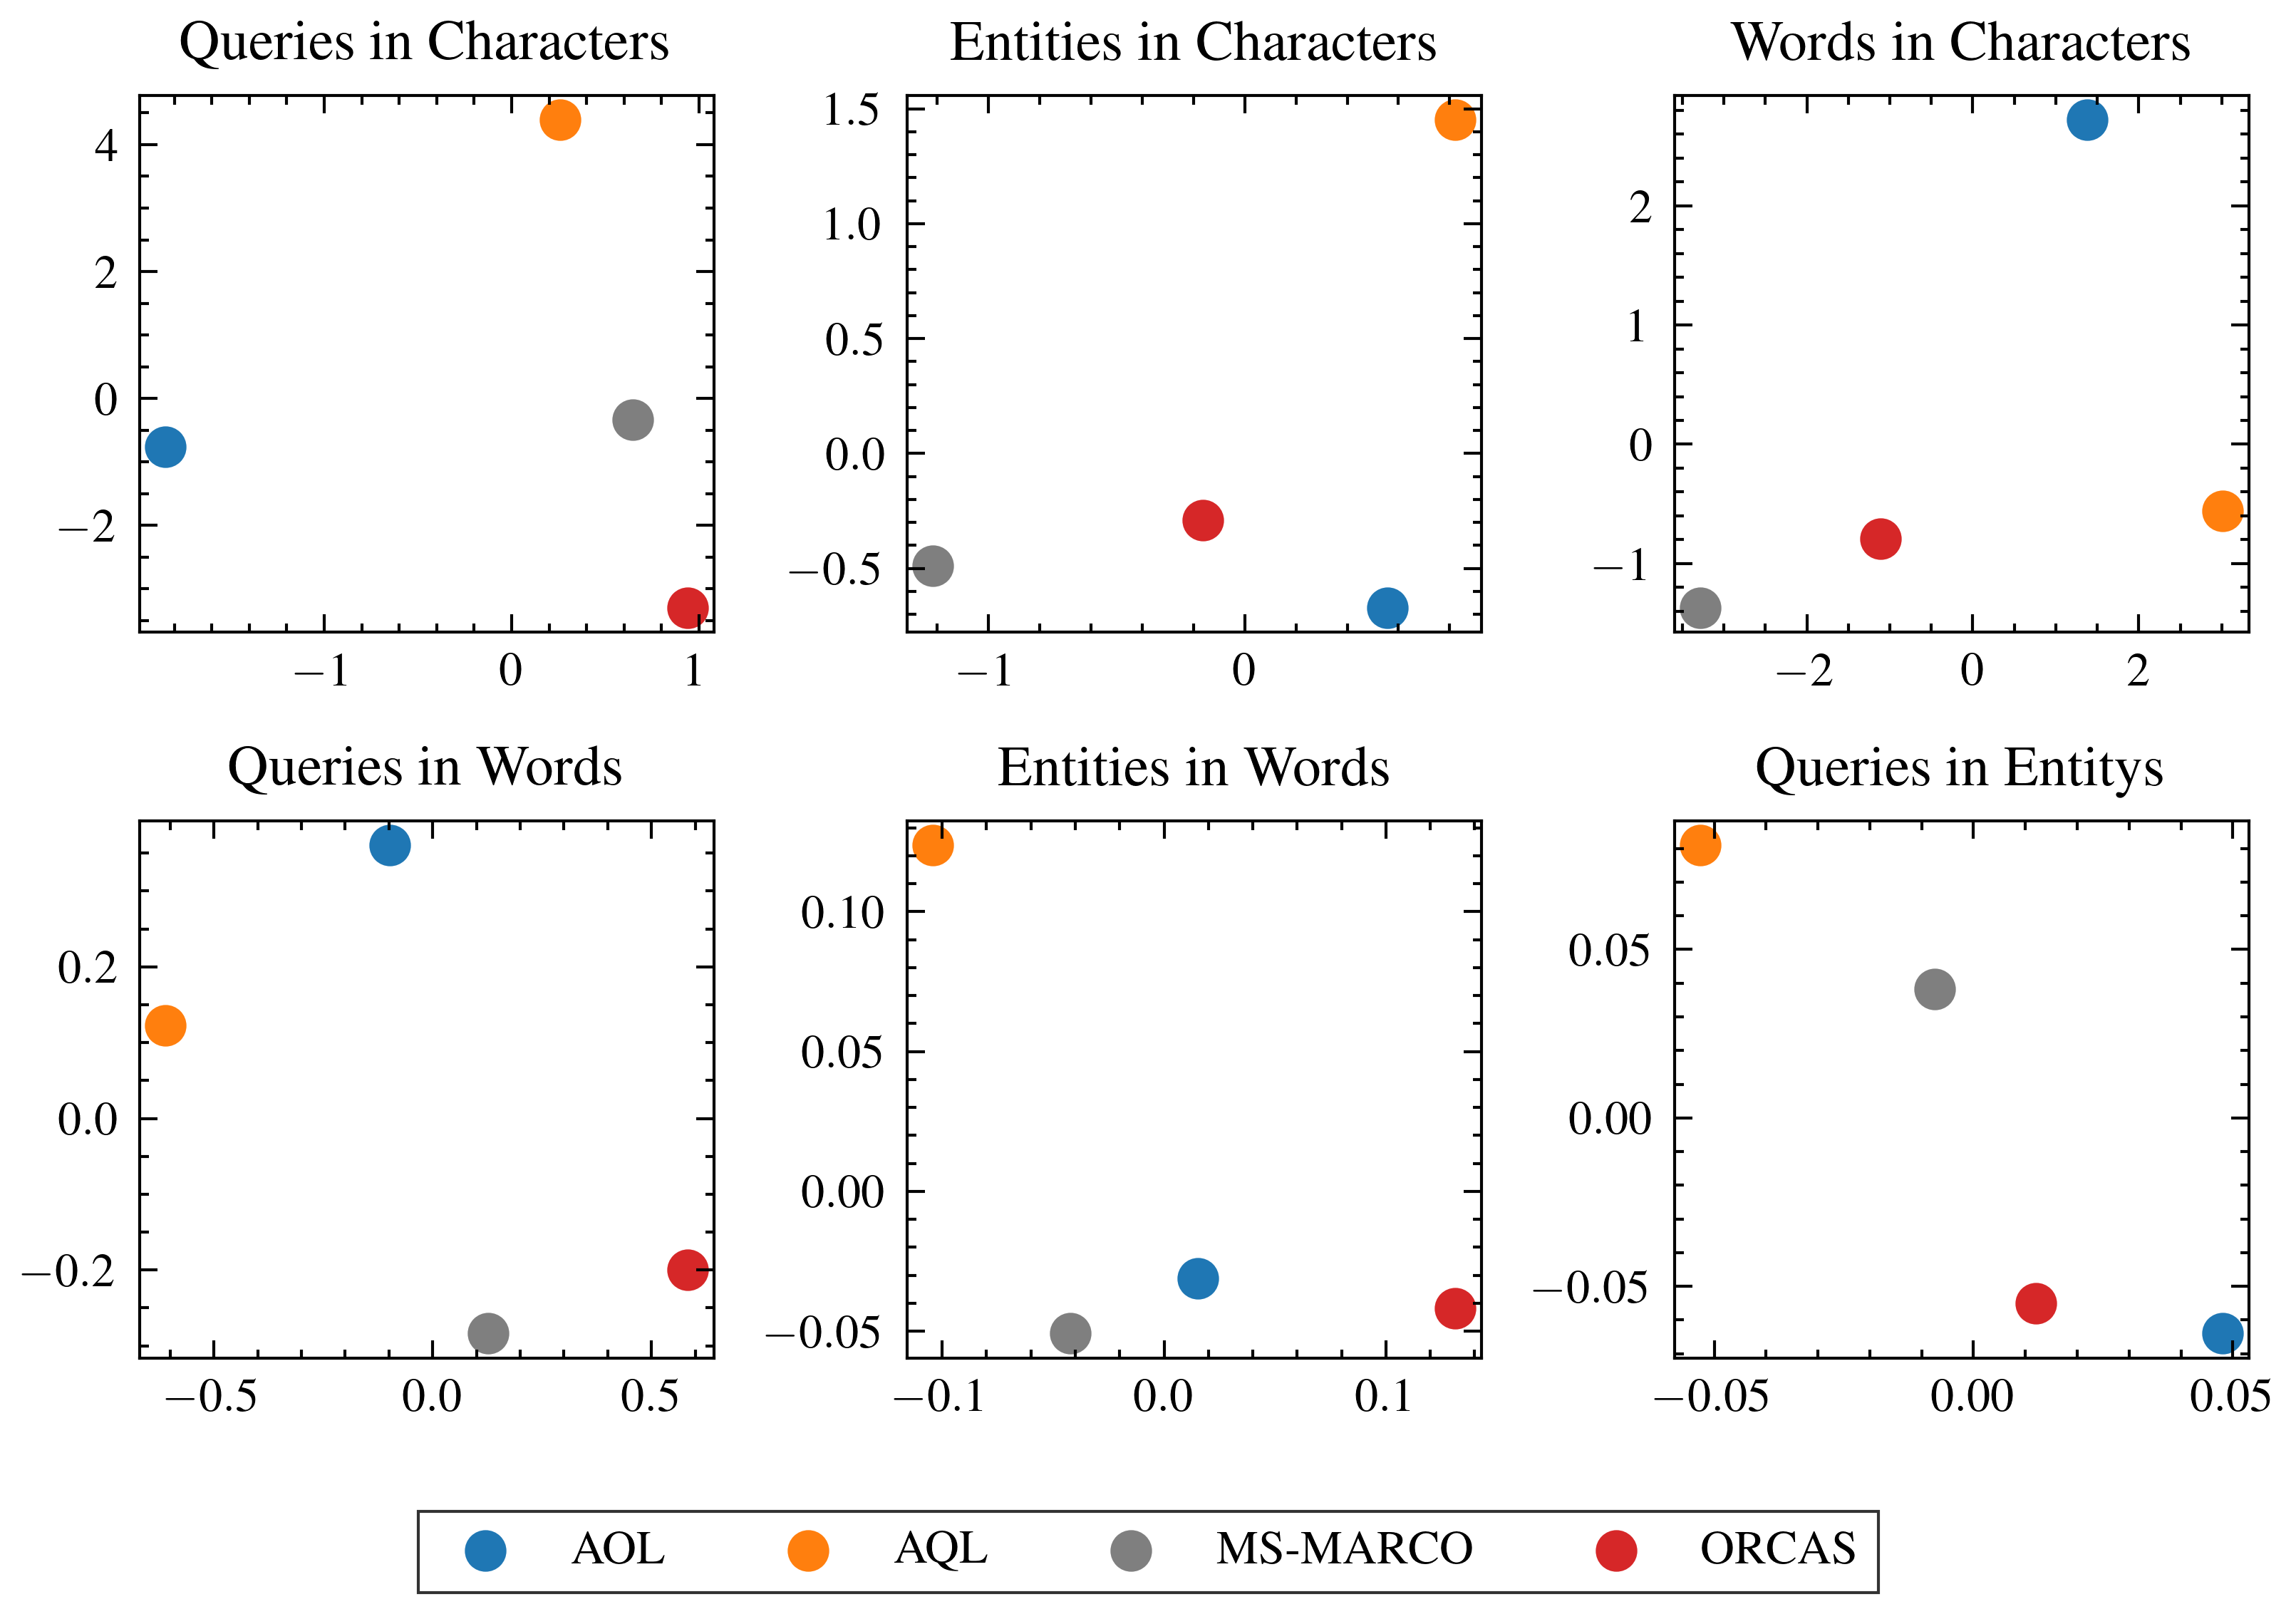

In [10]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
from pathlib import Path    
import scienceplots

# use science style for plots from scienceplots library
plt.style.use(["science", "ieee"])

save_vis = True
# save_vis = False

mds = MDS(n_components=2, dissimilarity='precomputed')
trans_dists = {}
color =  ['tab:blue', 'tab:orange', 'tab:gray', 'tab:red']
for key, value in distances_data.items():
    print(key)
    trans_dists.update({key: mds.fit_transform(value)})

num_plots = len(trans_dists)
cols = 3
rows = num_plots//cols
if num_plots % cols != 0:
    rows+=1

textwidth = 5.5129
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio * 0.85

# fig,ax = plt.subplots(rows,cols, figsize=(4*cols,4*rows))
fig,ax = plt.subplots(rows,cols, figsize=(width,height))

# for key, value in trans_dists.items() and ax in ax.flatten():
key = [key for key in trans_dists.keys()]
# title_list = []
# for i in key:
#     title_strings = {}
#     if key.split('-')[0] == 'character':
#         title_strings.update({key.split('-')[0]: [key]})
axes = ax.flatten()
for i in range(len(trans_dists)):
    ax = axes[i]
    value = trans_dists[key[i]]
    # plt.figure()
    for j in range(len(value)):
        ax.scatter(value[j][0], value[j][1], c=color[j], label=names[j].upper())
    # plt.scatter(trans_dists[key][:,0],trans_dists[key][:,1], c=color, label=names)
    # ax.title("MDS Plot of Wasserstein Distances")
    # plt.legend()
    # ax.set_xticks([])
    # ax.set_yticks([])
    ax.grid(False)
    ax.set_title(f"{key[i].split('-')[-1].title()} in {key[i].split('-')[0].title()}s")
    # ax.yticks([])
handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels,fancybox=True,framealpha=0.5).get_frame().set_linewidth(0.5)
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.01), fancybox=False, ncol=len(names),edgecolor="black", frameon=True).get_frame().set_linewidth(0.5)

# fig.suptitle("MDS Plot of Wasserstein Distances")
plt.tight_layout()
plt.show()

base_path = "/home/benjamin/studium/masterarbeit/thesis-schneg/plots/"

vis_dir = Path(f"{base_path}Wasserstein-Distances-Lengths")
if not vis_dir.exists() and save_vis:
        vis_dir.mkdir(parents=True)

if not vis_dir.exists() and save_vis:
        vis_dir.mkdir(parents=True)

if save_vis:
    fig.savefig(vis_dir.joinpath("all.pdf"), format='pdf')